In [13]:
! pip install pytesseract
! pip install opencv-python 

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)


In [15]:
import requests
import pytesseract
import cv2
from PIL import Image 
from IPython.display import HTML, clear_output
import numpy as np 
import pandas as pd 
import matplotlib as plt

#

In [16]:
img = Image.open('/Users/krushna/Downloads/1688750-William-Shakespeare-Quote-One-travels-long-distances-not-solely.jpg')
img_path = '/Users/krushna/Downloads/3ae888f0-05dc-43ce-9184-e6681b0ba565.jpeg'
img.resize((100,100))
img.save("new_img.jpeg")

In [17]:
#Extract 
custom_config = ' -l eng --oem 3 --psm 6'
my_extract_text = pytesseract.image_to_string(img, config = custom_config)
print(my_extract_text)

One travels long distances not solely for large
gatnerings, but for something more intangiole. |
nave always gone out on a limb for love. A fi
Gangerous, romantic, disappointing way to livg

Jennifer Ball



In [18]:
# Remove irregular symbols 
try:
    remove_char = "()@-*""/,+=*|^&~`"
    temp = my_extract_text
    for char in remove_char:
        temp = temp.replace(char, "")
    print(temp)
except IOError as e:
    print("Error (%s)" %e)
    
    

One travels long distances not solely for large
gatnerings but for something more intangiole. 
nave always gone out on a limb for love. A fi
Gangerous romantic disappointing way to livg

Jennifer Ball



In [19]:
# Opencv
img_data = cv2.imread('/Users/krushna/Downloads/1688750-William-Shakespeare-Quote-One-travels-long-distances-not-solely.jpg')

In [20]:
def transform_greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = transform_greyscale(img_data)
gray_image

array([[205, 205, 204, ..., 249, 248, 248],
       [204, 203, 203, ..., 249, 248, 248],
       [204, 204, 204, ..., 249, 249, 248],
       ...,
       [108, 106, 105, ...,  53,  53,  53],
       [110, 108, 106, ...,  53,  53,  53],
       [110, 108, 106, ...,  53,  53,  53]], dtype=uint8)

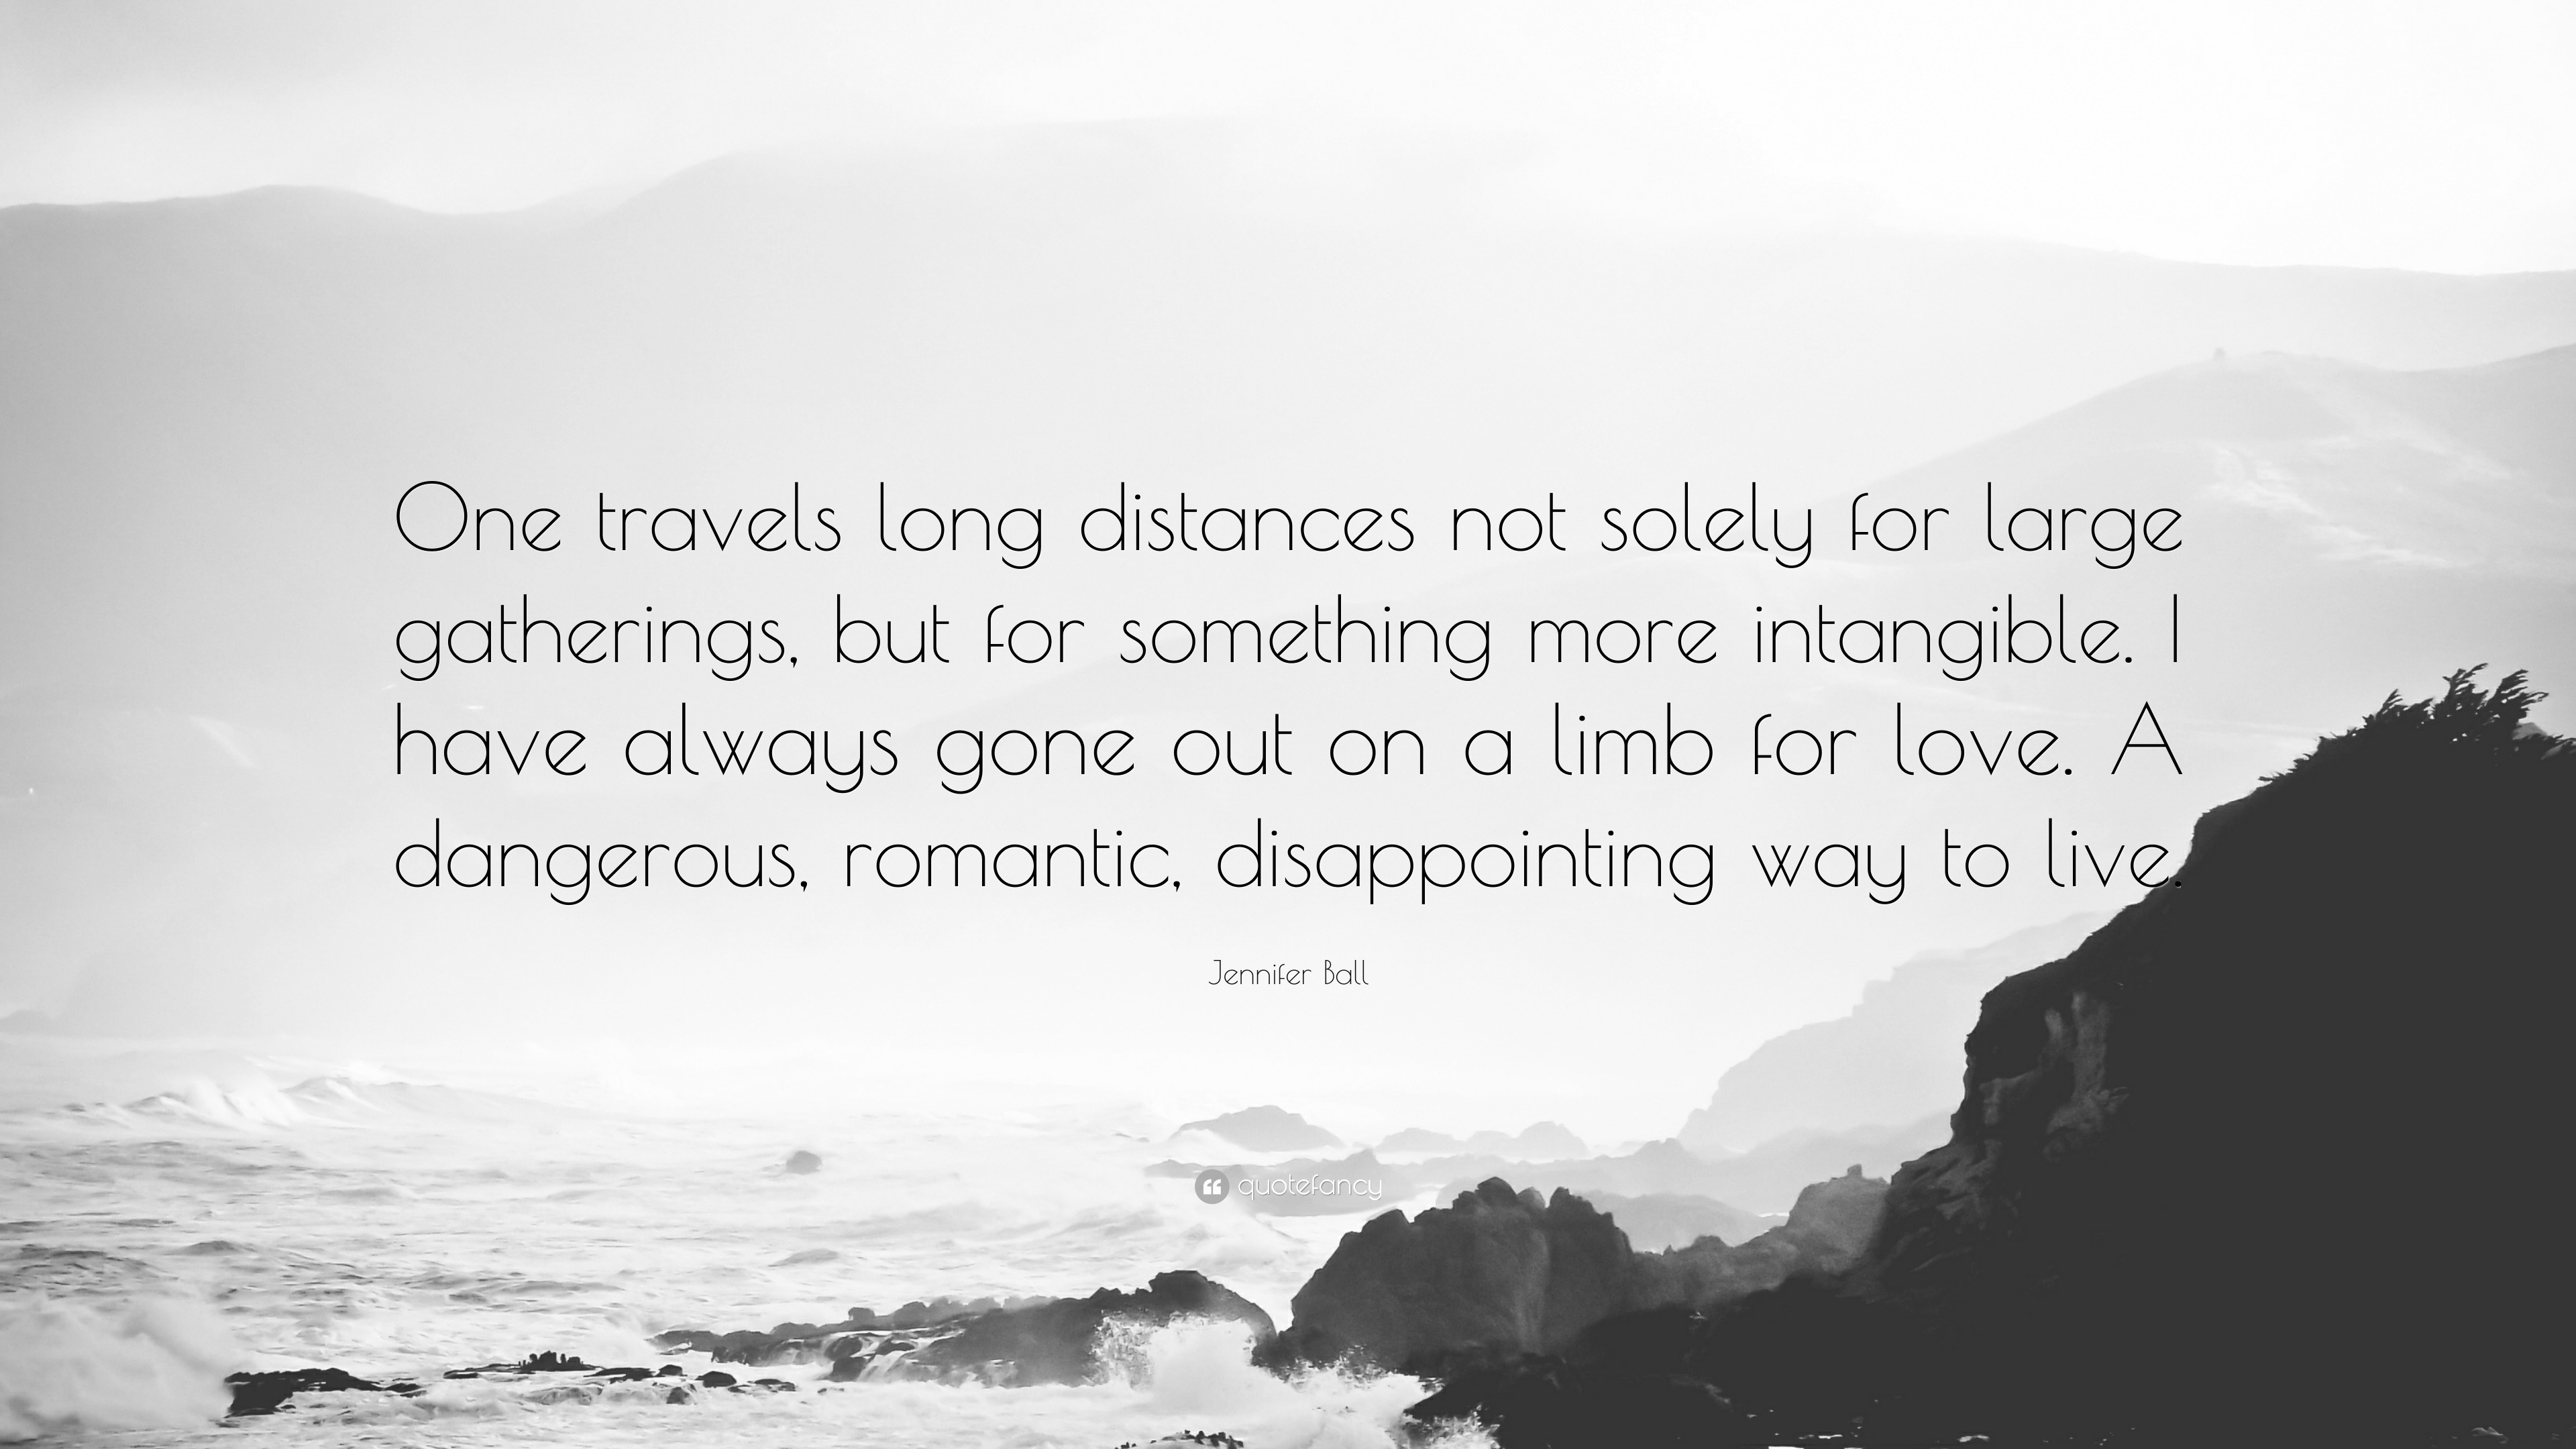

In [21]:
Image.fromarray(gray_image)

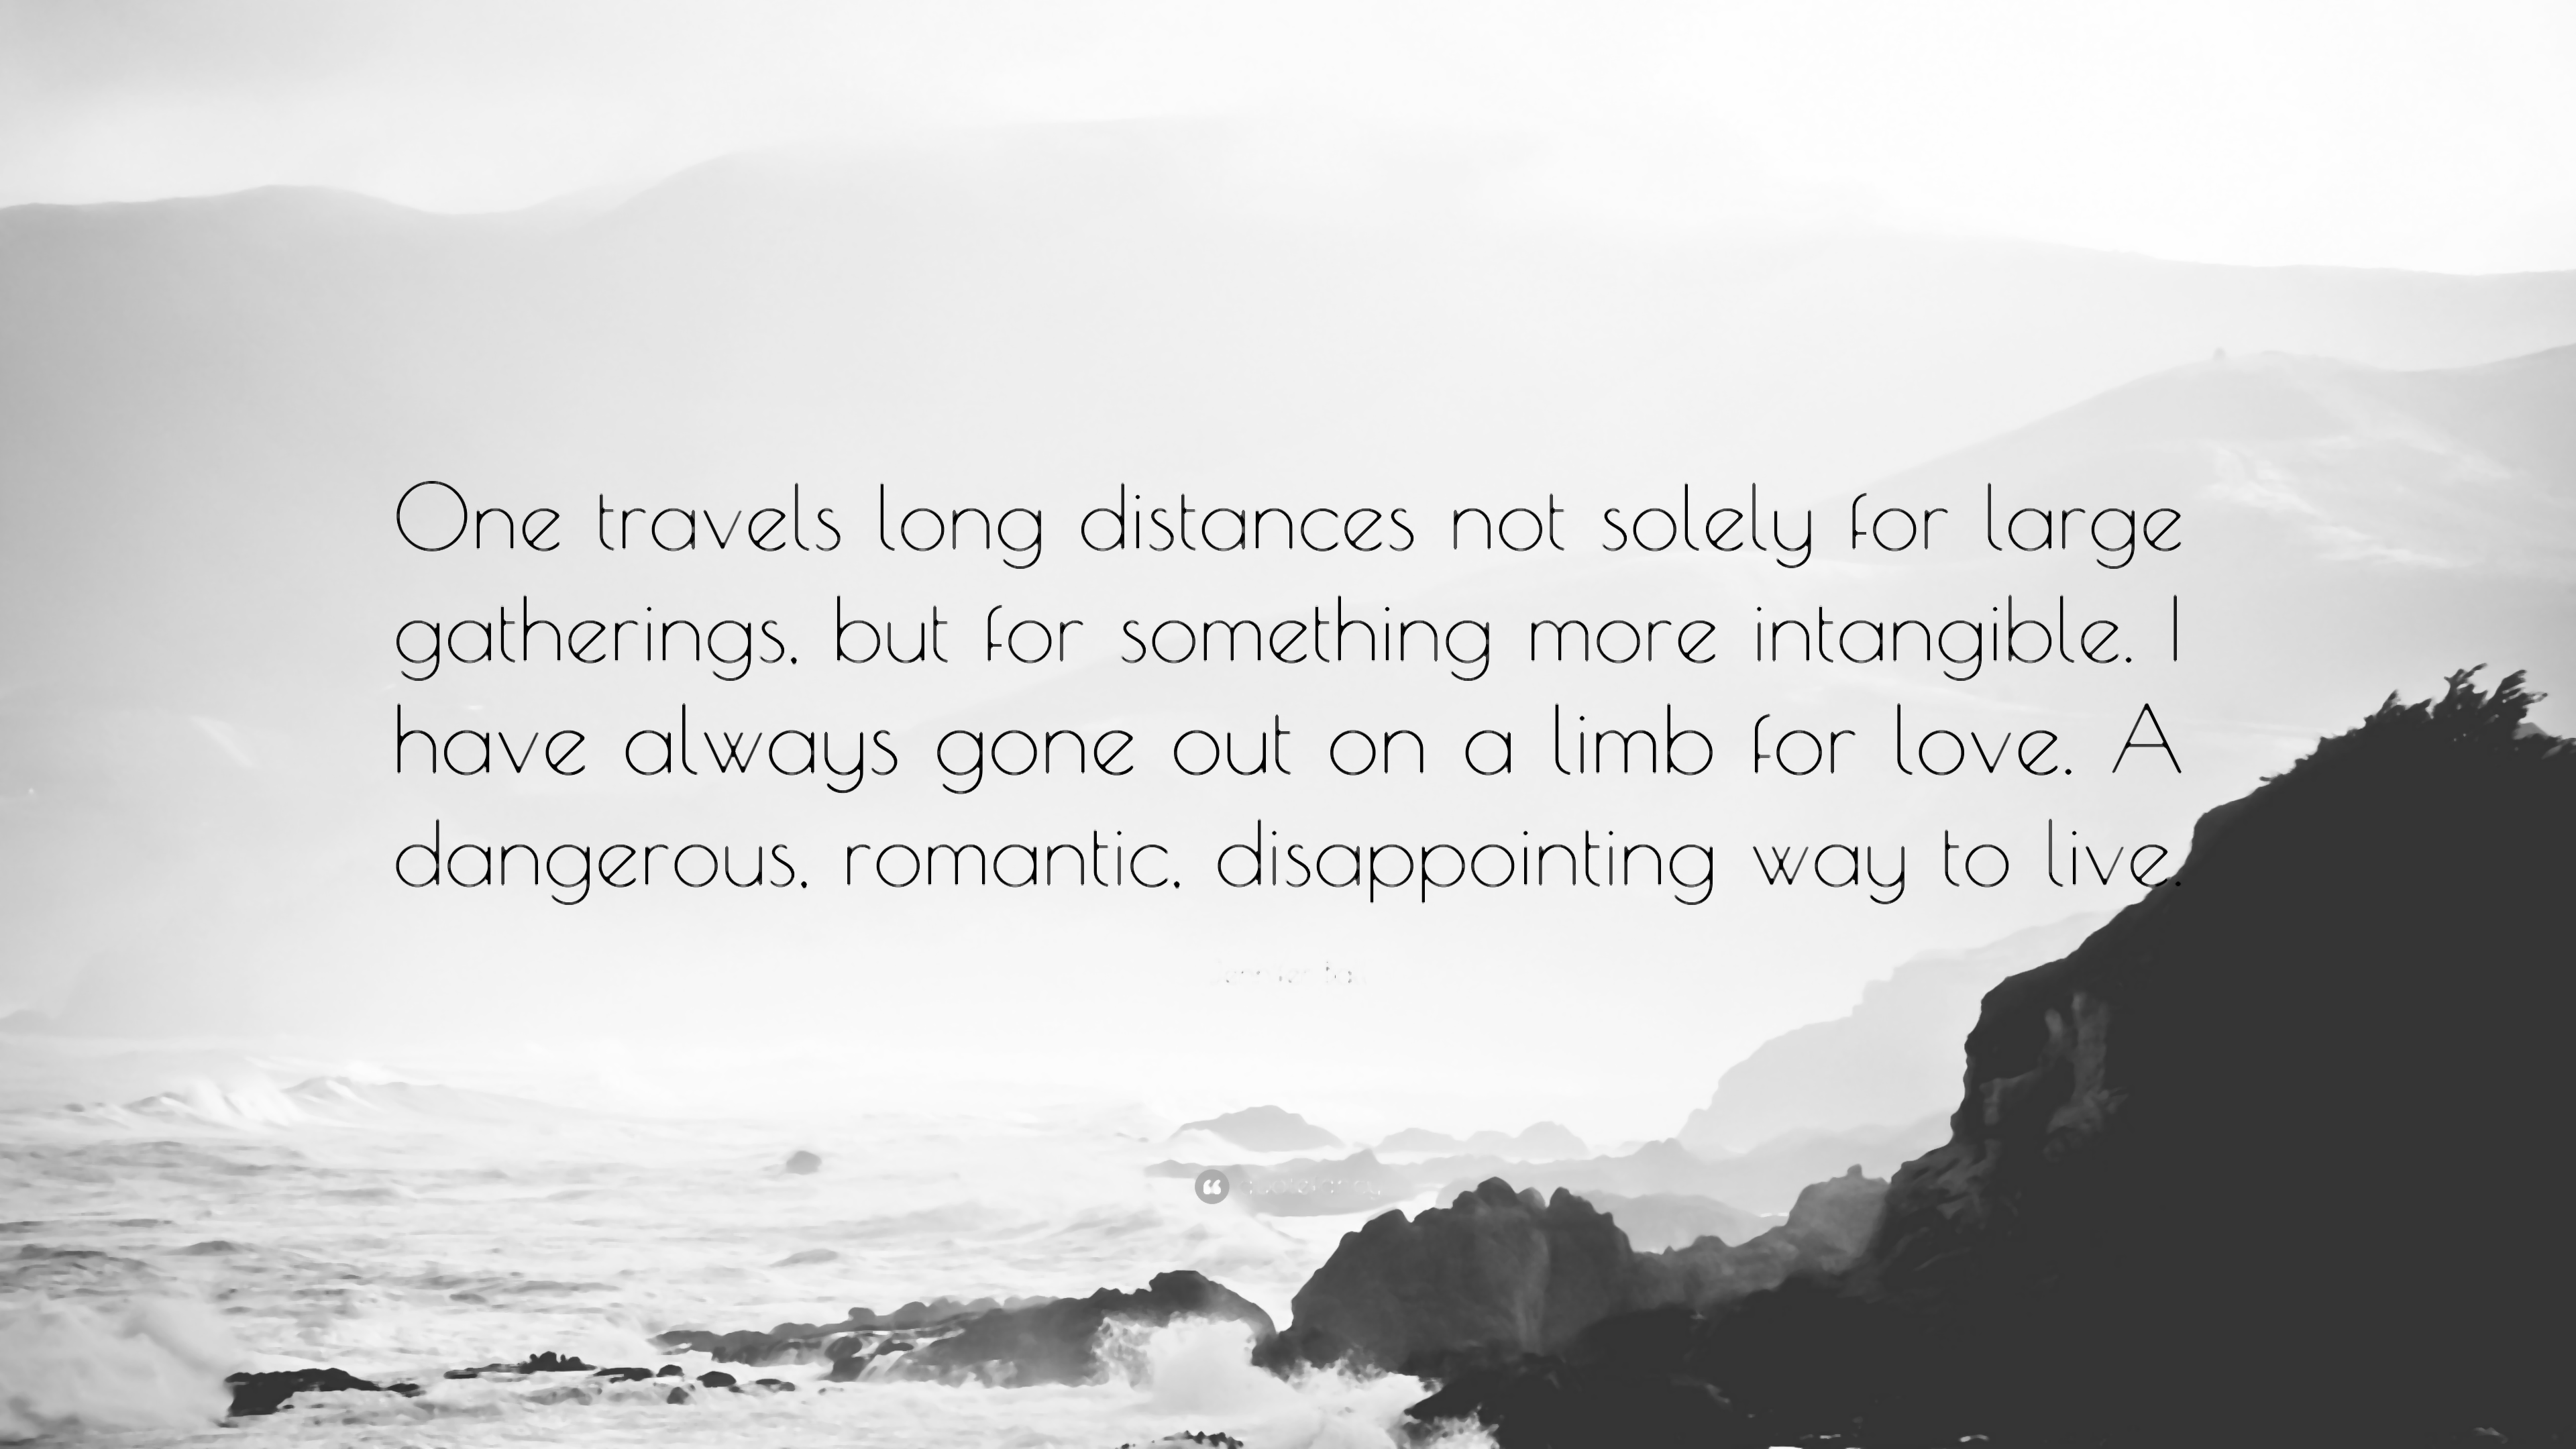

In [22]:
# noise removal
def noise_removal(image):
    return  cv2.medianBlur(image,7)

noise_removal_image = noise_removal(gray_image)
Image.fromarray(noise_removal_image)

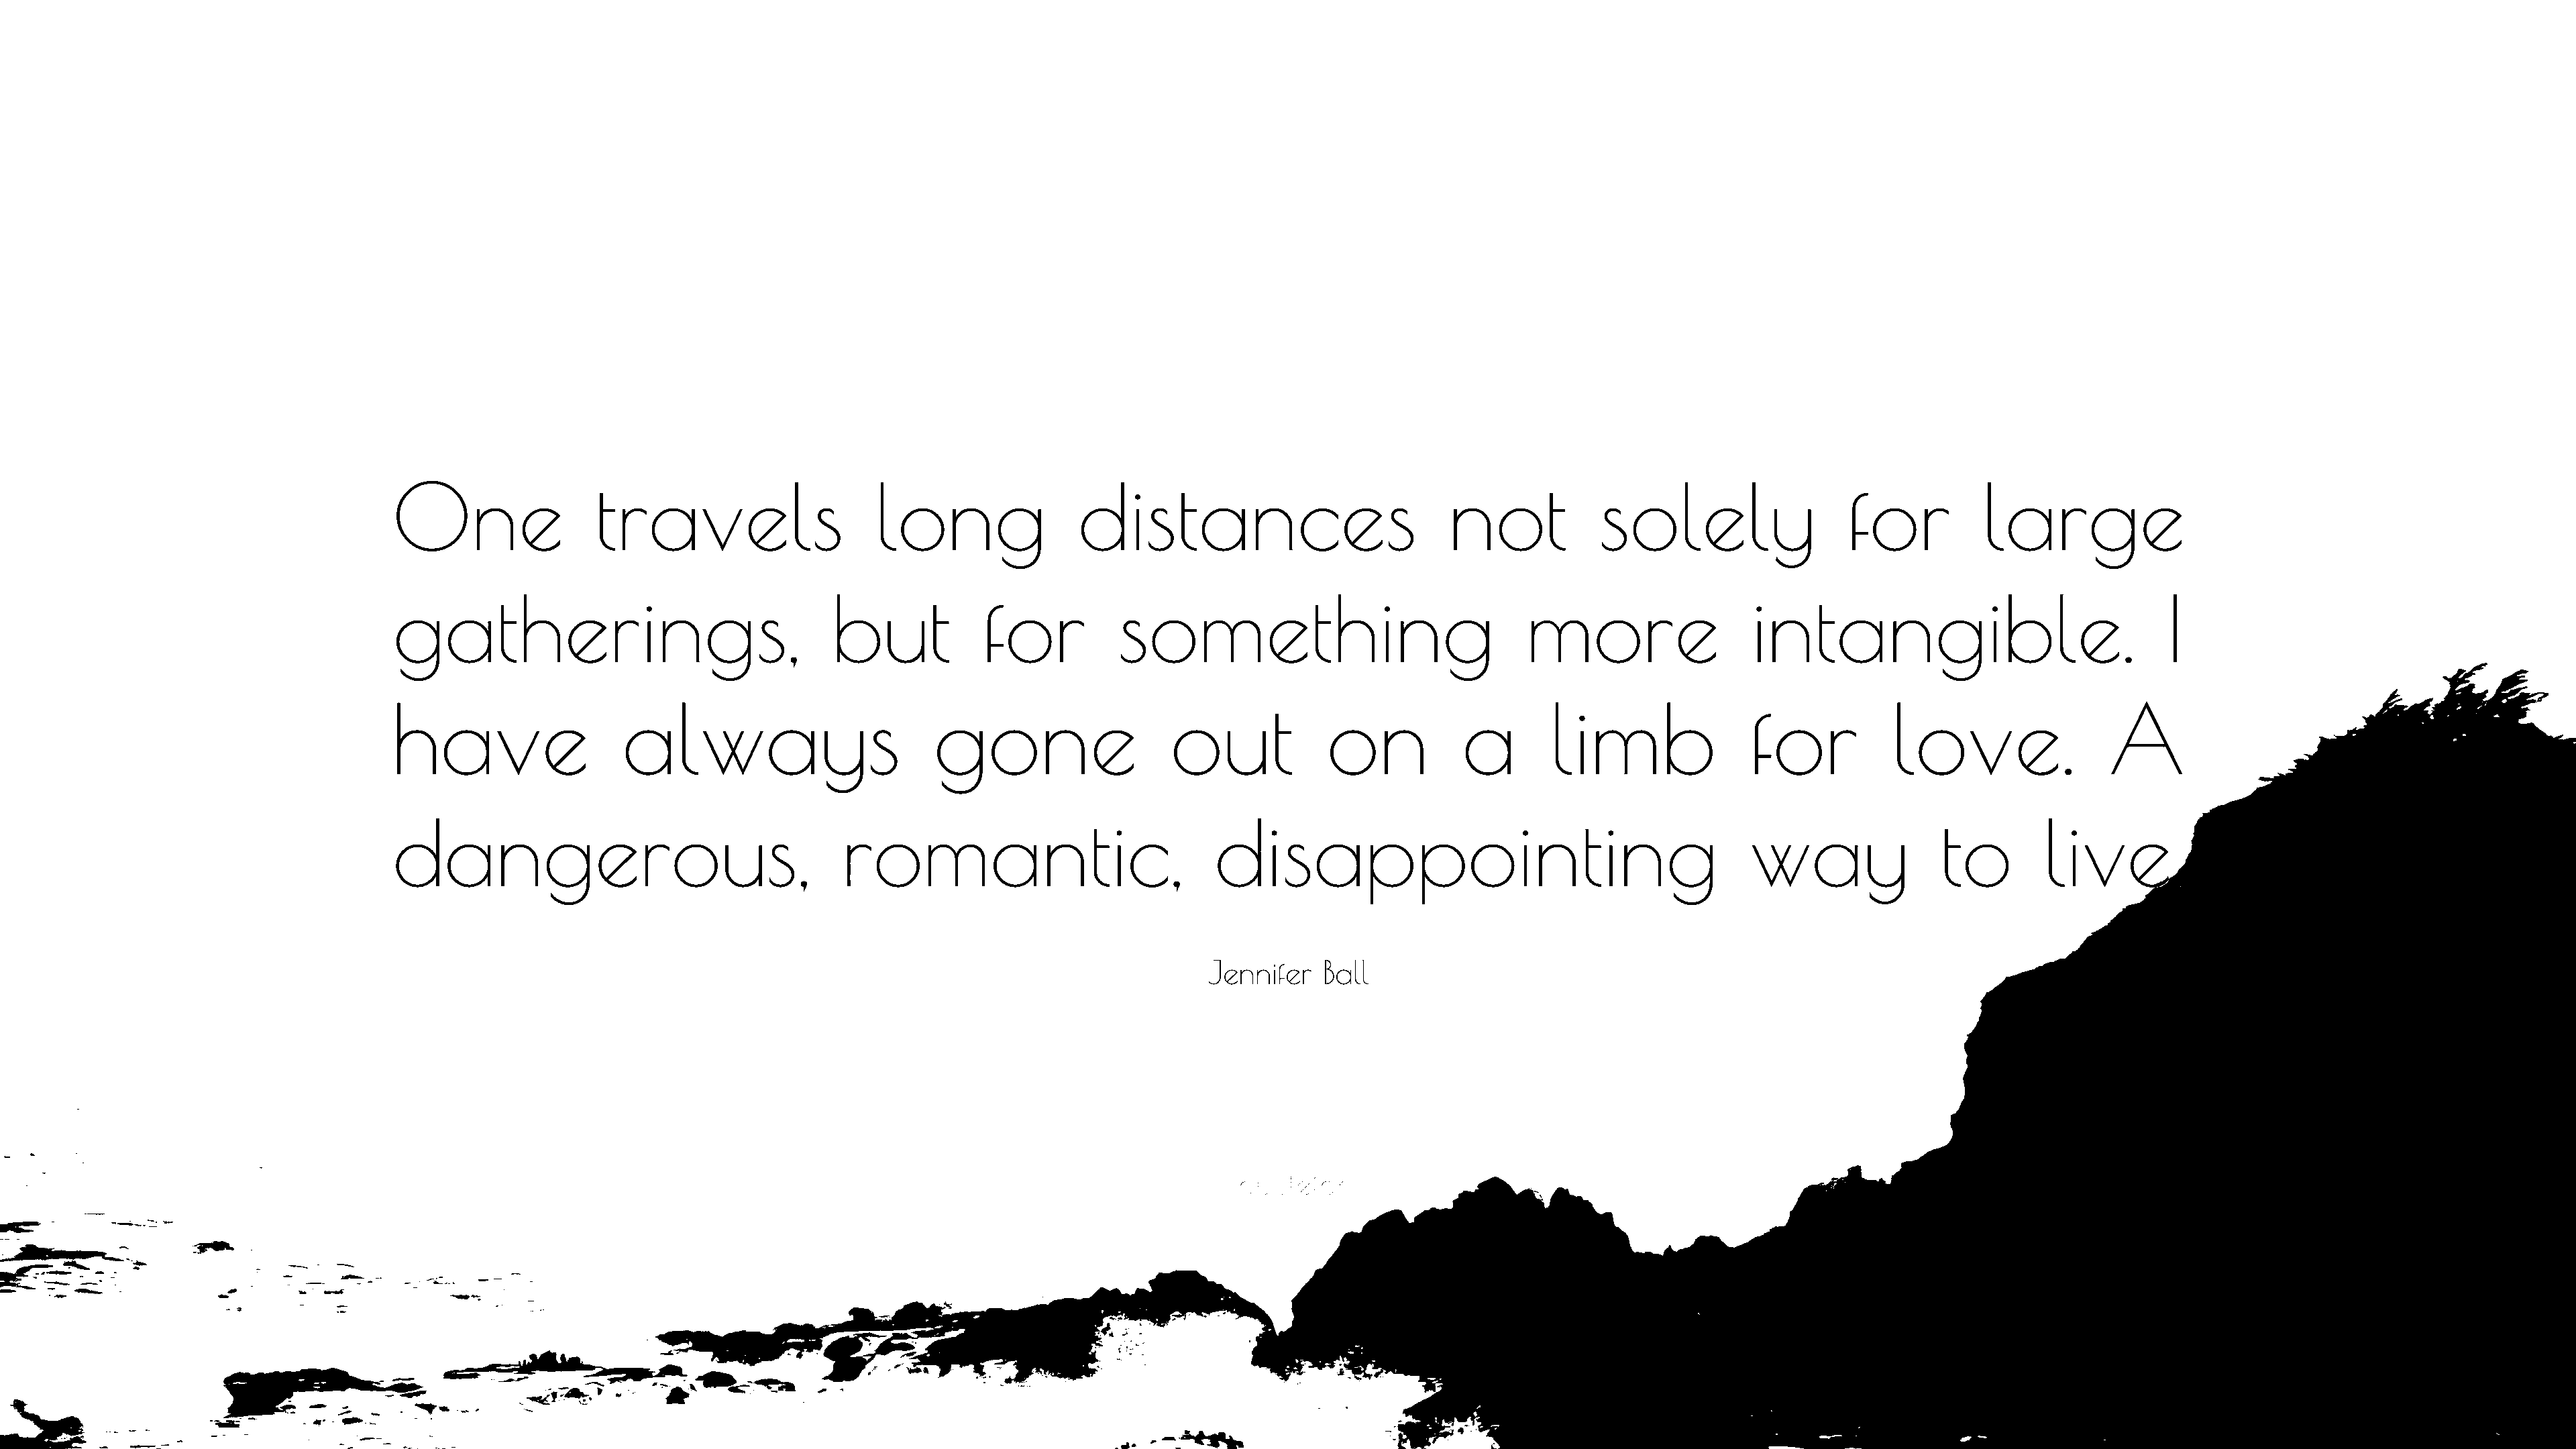

In [23]:
# Threshold tarnsformation 
def threshold_transform(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

threshold_image = threshold_transform(gray_image)
Image.fromarray(threshold_image)